##Import Required Libraries
We'll start by importing the necessary libraries:

PyTorch for constructing and training the neural network

NumPy for generating and manipulating data

Matplotlib for visualizing results and model performance


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

##Generate Synthetic 3-Variable Non-linear Data
Generates 100 data samples, each with 3 input features.

The target variable is computed using a non-linear (quadratic) equation.

Adds Gaussian noise to the target values to introduce realistic variability and mimic real-world data.


In [2]:
# === Generate 3-variable non-linear regression data ===
np.random.seed(42)

# Generate 100 samples of 3 features (X1, X2, X3)
X = np.random.rand(100, 3).astype(np.float32)

# Target: non-linear function of all 3 variables + noise
y = (X[:, 0]**2 + X[:, 1]**2 + X[:, 2]**2 + np.random.randn(100) * 0.05).astype(np.float32).reshape(-1, 1)


##Convert NumPy Arrays to PyTorch Tensors
Converts the input features and target values from NumPy arrays to PyTorch tensors.

This step is essential to enable model training and computation using PyTorch operations.


In [3]:
# Convert numpy arrays to torch tensors
X_train = torch.from_numpy(X)
y_train = torch.from_numpy(y)

##Define a 3-Layer Neural Network from Scratch
Manually initializes weights and biases for two hidden layers and one output layer.

Implements all computations using low-level tensor operations, utilizing einsum for efficient matrix multiplications.

Avoids high-level PyTorch modules like nn.Linear, showcasing a raw, from-scratch neural network setup.


In [4]:
# 3-layer neural network from scratch in PyTorch
class SimpleNN(torch.nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Manually initialize weights and biases for each layer
        self.W1 = torch.nn.Parameter(torch.randn(1, 5, dtype=torch.float32))  # Input to hidden layer weights
        self.b1 = torch.nn.Parameter(torch.zeros(1, 5, dtype=torch.float32))  # Bias for hidden layer

        self.W2 = torch.nn.Parameter(torch.randn(5, 5, dtype=torch.float32))  # Hidden to hidden layer weights
        self.b2 = torch.nn.Parameter(torch.zeros(1, 5, dtype=torch.float32))  # Bias for hidden layer

        self.W3 = torch.nn.Parameter(torch.randn(5, 1, dtype=torch.float32))  # Hidden to output layer weights
        self.b3 = torch.nn.Parameter(torch.zeros(1, 1, dtype=torch.float32))  # Bias for output layer

    def forward(self, x):
        # First hidden layer with ReLU
        a1 = torch.einsum('bi,ij->bj', x, self.W1) + self.b1
        h1 = torch.relu(a1)

        # Second hidden layer with ReLU
        a2 = torch.einsum('bi,ij->bj', h1, self.W2) + self.b2
        h2 = torch.relu(a2)

        # Output layer
        a3 = torch.einsum('bi,ij->bj', h2, self.W3) + self.b3
        return a3

# Instantiate the network
model = SimpleNN()

##Define Mean Squared Error (MSE) Loss Function
Implements a custom MSE loss function to quantify the model's prediction error.

Computes the average of the squared differences between the predicted values and the actual target values, penalizing larger errors more heavily.


In [5]:
# Loss function (Mean Squared Error)
def compute_loss(y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

##Train the Neural Network
Executes the full training loop: performs the forward pass, computes the loss, applies backpropagation, and updates weights and biases.

Tracks training performance by recording the loss at each epoch.

Prints the loss every 100 epochs to monitor learning progress and convergence.

In [6]:
# Training loop
epochs = 1000
learning_rate = 0.01
losses = []

for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = compute_loss(y_pred, y_train)
    losses.append(loss.item())  # Append loss value to track it

    # Backward pass and optimize
    model.zero_grad()  # Clear previous gradients
    loss.backward()    # Backpropagation to compute gradients

    # Update weights and biases manually
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 2.328062057495117
Epoch 100, Loss: 0.20481716096401215
Epoch 200, Loss: 0.13136954605579376
Epoch 300, Loss: 0.06783712655305862
Epoch 400, Loss: 0.03343433886766434
Epoch 500, Loss: 0.020615242421627045
Epoch 600, Loss: 0.01703343540430069
Epoch 700, Loss: 0.01607370562851429
Epoch 800, Loss: 0.015856284648180008
Epoch 900, Loss: 0.01579481177031994


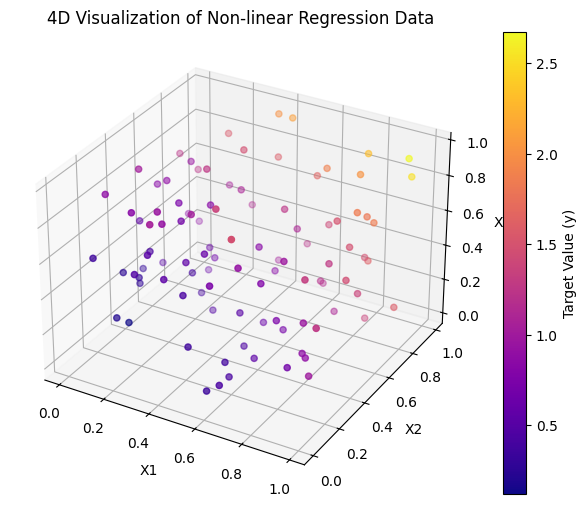

In [7]:
# === 4D Plot: x1, x2, x3 as position, y as color ===
from mpl_toolkits.mplot3d import Axes3D

X_np = X  # original numpy input
y_np = y  # original target

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X_np[:, 0], X_np[:, 1], X_np[:, 2], c=y_np[:, 0], cmap='plasma')
plt.colorbar(sc, ax=ax, label='Target Value (y)')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")
ax.set_title("4D Visualization of Non-linear Regression Data")
plt.show()


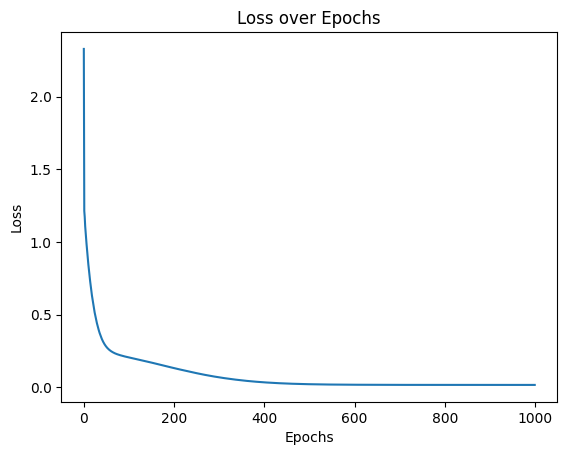

In [8]:
# Plotting the loss curve
plt.plot(losses)
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

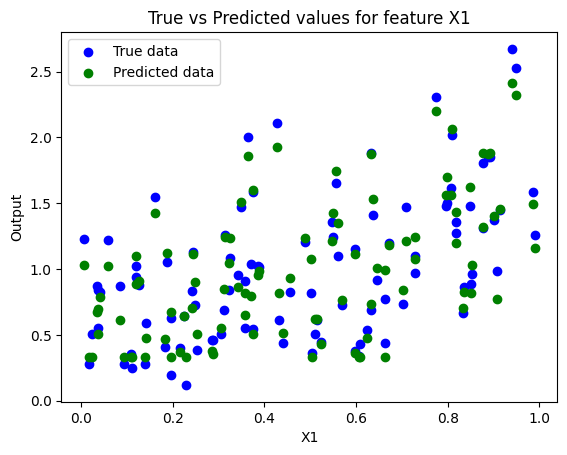

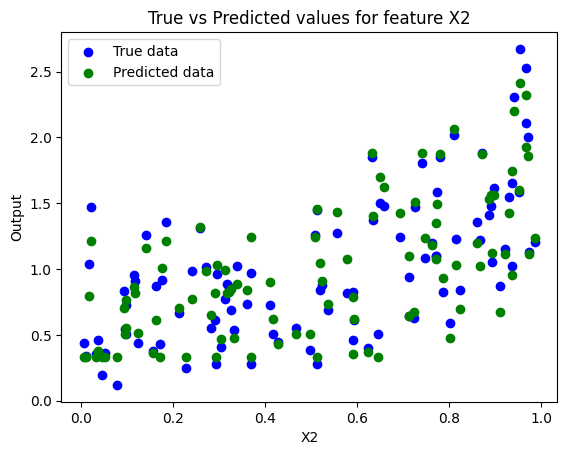

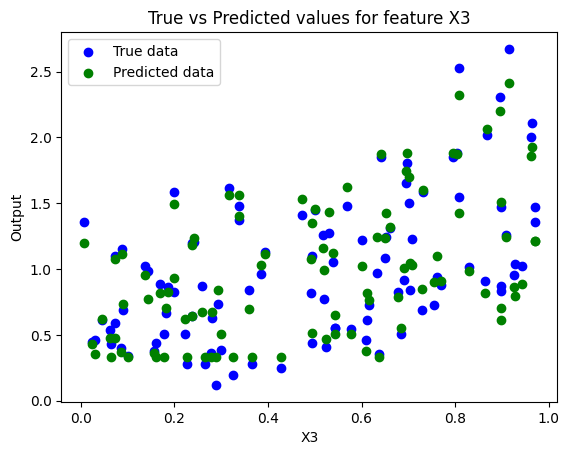

In [10]:
# Plotting the predictions vs true values
y_pred = model(X_train).detach().numpy()  # Get predictions from model
# Iterate through features for scatter plots
for i in range(X.shape[1]):
    plt.scatter(X[:, i], y, color='blue', label='True data')
    plt.scatter(X[:, i], y_pred, color='green', label='Predicted data')
    plt.title(f'True vs Predicted values for feature X{i+1}')
    plt.xlabel(f'X{i+1}')
    plt.ylabel('Output')
    plt.legend()
    plt.show()